# Função de Transferência

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
import sympy as sym

In [8]:
#Momento de inercia rotor [Kg*m²]
J = 3.228e-6
#Constante de atrito viscoso [Nms]
b = 3.5077e-6
#fem [v/rad/s]
Kb = 0.0274 
#constate do torque do motor [N.m/A]
Kt = 0.0274
#Resistencia elétrica [Ohms]
R = 4
#Inductancia elétrica
L = 2.75e-6
K = Kt

In [3]:
s = sym.Symbol('s')

In [10]:
Pos = K/(s*((J*s+b)*(L*s+R)+K**2))
Pos

0.0274/(s*((2.75e-6*s + 4)*(3.228e-6*s + 3.5077e-6) + 0.00075076))

In [11]:
Pos = co.tf([0.0274],[8.878e-5, 1.291e-5, 0.0007648, 0])
Pos

TransferFunction(array([0.0274]), array([8.878e-05, 1.291e-05, 7.648e-04, 0.000e+00]))

In [12]:
#Resposta em malha aberta

In [13]:
t = np.linspace(0,1,100)
t, y = co.step_response(Pos)

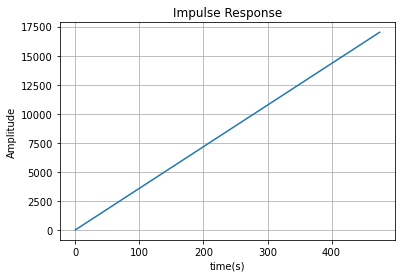

In [15]:
plt.plot(t,y)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid()

In [16]:
#Resposta em malha fechada

In [17]:
Pos_Closed = co.feedback(Pos, 1)
Pos_Closed

TransferFunction(array([0.0274]), array([8.878e-05, 1.291e-05, 7.648e-04, 2.740e-02]))

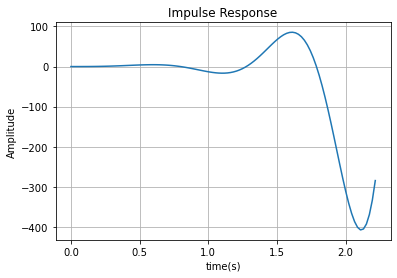

In [18]:
t = np.linspace(0,1,100)
t, y = co.step_response(Pos_Closed)
plt.plot(t,y)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid()

In [ ]:
# Controlador PI
Kp = 20
Ki = 100